<a href="https://colab.research.google.com/github/Ishanavi/ProConfusionMatrix/blob/main/ProConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
data_upload = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [3]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("BankNote_Authentication.csv")

print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


[Text(0, 0.5, 'Forged'), Text(0, 1.5, 'Authorized')]

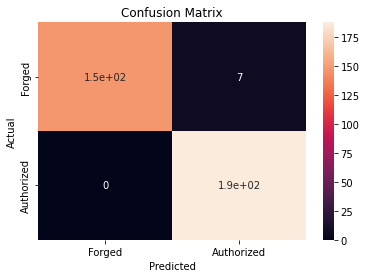

In [5]:
from sklearn.model_selection import train_test_split

factors = df[["variance","skewness","curtosis","entropy"]]
result = df["class"]

factor_train,factor_test,result_train,result_test = train_test_split(factors,result,test_size = 0.25,random_state = 0)

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
factor_train = sc_x.fit_transform(factor_train)
factor_test = sc_x.transform(factor_test)

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(factor_train,result_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto',
                   n_jobs=None, penalty="l2", random_state=0, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

import numpy as np

forgery_prediction = classifier.predict(factor_test)
forgery_test = np.reshape(result_test.ravel(),(len(result_test),1))

predicted_values = []
actual_values = []

for i in forgery_prediction:
  if i == 0:
    predicted_values.append("Authorized")
  else:
    predicted_values.append("Forged")

for i in forgery_test:
  if i == 0:
    actual_values.append("Authorized")
  else:
    actual_values.append("Forged")

labels = ["Forged","Authorized"]

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(predicted_values,actual_values,labels=labels)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [8]:
accuracy = (1.5e+02+1.9e+02)/(0+7)
print(f"Accuracy --> {accuracy}")

Accuracy --> 48.57142857142857
